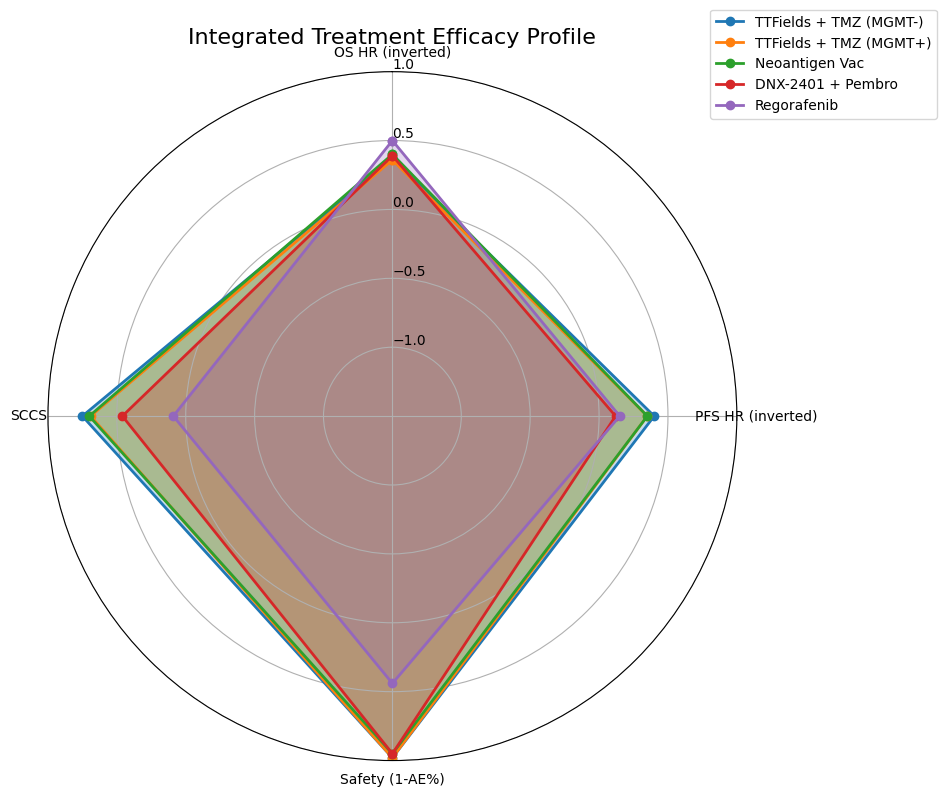

In [2]:
# 1
# Multi-dimensional radar/spider chart with integrated treatment efficacy profile
import matplotlib.pyplot as plt
import numpy as np

# Data from Table 1: SCCS report
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703,
# pmc.ncbi.nlm.nih.gov/articles/PMC10462574, mdpi.com/2072-6694/15/17/4279
treatments = ['TTFields + TMZ (MGMT+)', 'TTFields + TMZ (MGMT-)', 'Bev + CCNU',
              'Nivolumab', 'Pembro ± Bev', 'Regorafenib', 'DNX-2401 + Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']

metrics = ['OS HR (inverted)', 'PFS HR (inverted)', 'Safety (1-AE%)', 'SCCS']

# Convert HR values to benefit values (1-HR) for radar chart
data = np.array([
    [1-0.64, 1-0.65, 1-0.02, 0.69],  # TTFields + TMZ (MGMT+)
    [1-0.63, 1-0.60, 1-0.02, 0.75],  # TTFields + TMZ (MGMT-)
    [1-0.90, 1-0.60, 1-0.64, -0.14], # Bev + CCNU
    [1-1.00, 1-2.00, 1-0.18, -1.18], # Nivolumab
    [1-0.85, 1-0.90, 1-0.10, 0.15],  # Pembro ± Bev
    [1-0.50, 1-0.85, 1-0.56, 0.09],  # Regorafenib
    [1-0.61, 1-0.88, 1-0.05, 0.46],  # DNX-2401 + Pembro
    [1-0.82, 1-1.00, 1-0.05, 0.13],  # DCVax-L
    [1-0.60, 1-0.65, 1-0.05, 0.70],  # Neoantigen Vac
    [1-0.81, 1-0.85, 1-0.18, 0.16]   # Osimertinib
])

# Select top 5 treatments for clarity
selected_idx = [1, 0, 8, 6, 5]  # TTFields MGMT-, TTFields MGMT+, Neoantigen, DNX-2401, Regorafenib
selected_treatments = [treatments[i] for i in selected_idx]
selected_data = data[selected_idx]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(1, 1, figsize=(10, 8), subplot_kw=dict(projection='polar'))

for i, treatment in enumerate(selected_treatments):
    values = selected_data[i].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=treatment)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(-1.5, 1)
ax.set_rgrids([-1, -0.5, 0, 0.5, 1], angle=0)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_title('Integrated Treatment Efficacy Profile', size=16, pad=20)
plt.tight_layout()
plt.show()

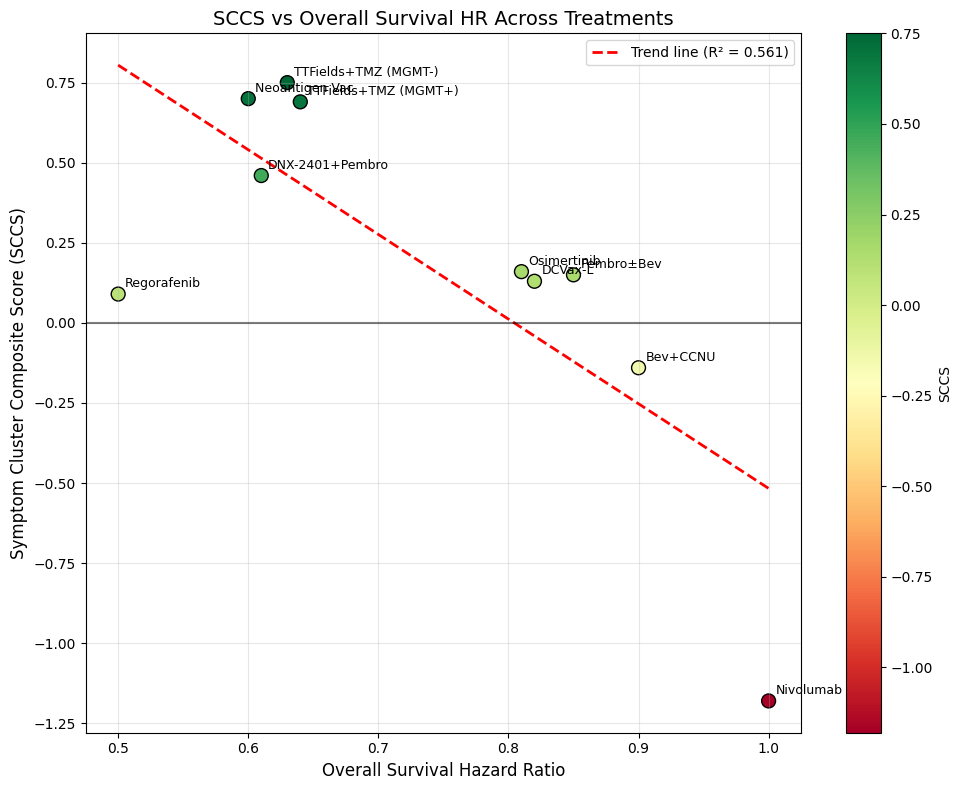

In [3]:
# 2
# Scatter plot with trend line of SCCS vs. overall survival HR
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data from Table 1: SCCS report
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703,
# pmc.ncbi.nlm.nih.gov/articles/PMC10462574, mdpi.com/2072-6694/15/17/4279,
# pmc.ncbi.nlm.nih.gov/articles/PMC7243167, pmc.ncbi.nlm.nih.gov/articles/PMC8284901

os_hr = np.array([0.64, 0.63, 0.90, 1.00, 0.85, 0.50, 0.61, 0.82, 0.60, 0.81])
sccs = np.array([0.69, 0.75, -0.14, -1.18, 0.15, 0.09, 0.46, 0.13, 0.70, 0.16])
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(os_hr, sccs, s=100, c=sccs, cmap='RdYlGn', edgecolors='black')

# Add trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(os_hr, sccs)
x_trend = np.linspace(min(os_hr), max(os_hr), 100)
y_trend = slope * x_trend + intercept
plt.plot(x_trend, y_trend, 'r--', linewidth=2, label=f'Trend line (R² = {r_value**2:.3f})')

# Label points
for i, txt in enumerate(treatments):
    plt.annotate(txt, (os_hr[i], sccs[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Overall Survival Hazard Ratio', fontsize=12)
plt.ylabel('Symptom Cluster Composite Score (SCCS)', fontsize=12)
plt.title('SCCS vs Overall Survival HR Across Treatments', fontsize=14)
plt.colorbar(scatter, label='SCCS')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

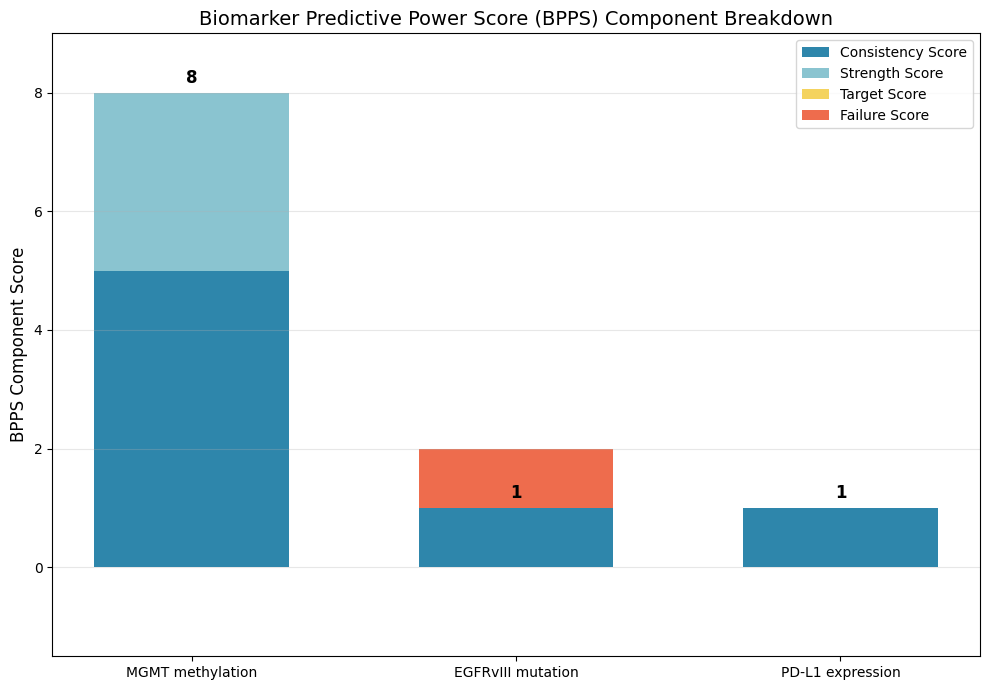

In [4]:
# 3
# Stacked bar chart: BPPS component breakdown by biomarker
import matplotlib.pyplot as plt
import numpy as np

# Data from Table 2: BPPS report
# Consistent with context throughout meta-analyses
biomarkers = ['MGMT methylation', 'EGFRvIII mutation', 'PD-L1 expression']
consistency = [5, 1, 1]
strength = [3, 0, 0]
target = [0, 1, 0]
failure = [0, -1, 0]
total_bpps = [8, 1, 1]

fig, ax = plt.subplots(figsize=(10, 7))
width = 0.6
x = np.arange(len(biomarkers))

# Create stacked bars
p1 = ax.bar(x, consistency, width, label='Consistency Score', color='#2E86AB')
p2 = ax.bar(x, strength, width, bottom=consistency, label='Strength Score', color='#8AC4D0')
p3 = ax.bar(x, target, width, bottom=np.array(consistency)+np.array(strength),
            label='Target Score', color='#F4D35E')

# Handle negative values separately
failure_pos = np.array(consistency) + np.array(strength) + np.array(target)
p4 = ax.bar(x, failure, width, bottom=failure_pos, label='Failure Score', color='#EE6C4D')

# Add total BPPS values on top
for i, total in enumerate(total_bpps):
    ax.text(i, total + 0.1, str(total), ha='center', va='bottom', fontweight='bold', fontsize=12)

ax.set_ylabel('BPPS Component Score', fontsize=12)
ax.set_title('Biomarker Predictive Power Score (BPPS) Component Breakdown', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(biomarkers, rotation=0)
ax.legend(loc='upper right')
ax.set_ylim(min(failure) - 0.5, max(total_bpps) + 1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

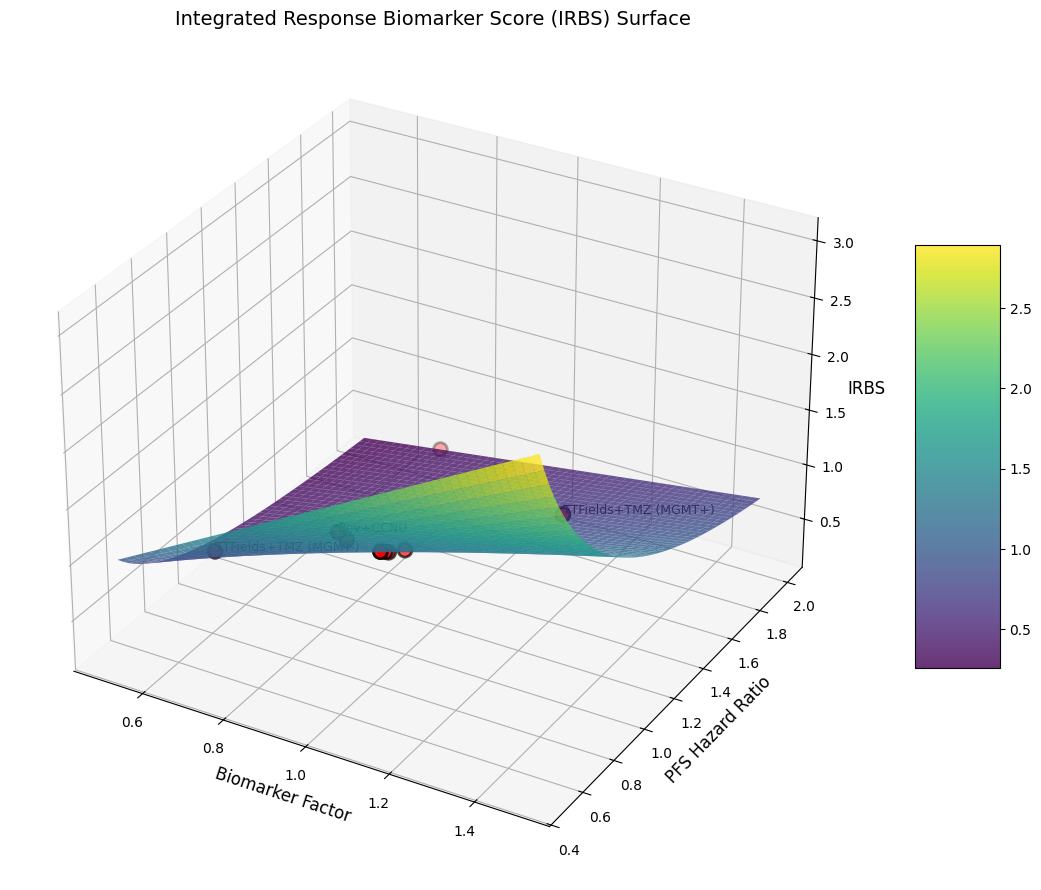

In [5]:
# 4
# 3D surface plot: IRBS as a function of biomarker factor and PFS HR
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data from Table 3: IRBS report
# URLs: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, pmc.ncbi.nlm.nih.gov/articles/PMC10462574,
# mdpi.com/2072-6694/15/17/4279, pmc.ncbi.nlm.nih.gov/articles/PMC7243167

# Create theoretical ranges based on observed data
biomarker_factors = np.linspace(0.5, 1.5, 50)
pfs_hrs = np.linspace(0.5, 2.0, 50)
X, Y = np.meshgrid(biomarker_factors, pfs_hrs)
Z = X * (1 / Y)  # IRBS = Biomarker_Factor * (1/PFS_HR)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Add actual data points
actual_biomarker = [1.5, 0.7, 1.0, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
actual_pfs_hr = [0.65, 0.60, 0.60, 2.0, 0.90, 0.85, 0.88, 1.0, 0.65, 0.85]
actual_irbs = [2.31, 1.17, 1.67, 0.35, 1.11, 1.18, 1.14, 1.00, 1.54, 1.18]
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']

scatter = ax.scatter(actual_biomarker, actual_pfs_hr, actual_irbs, c='red', s=100,
                    edgecolor='black', linewidth=2)

# Label key points
for i, txt in enumerate(treatments[:3]):  # Label only first 3 for clarity
    ax.text(actual_biomarker[i], actual_pfs_hr[i], actual_irbs[i], txt, fontsize=9)

ax.set_xlabel('Biomarker Factor', fontsize=12)
ax.set_ylabel('PFS Hazard Ratio', fontsize=12)
ax.set_zlabel('IRBS', fontsize=12)
ax.set_title('Integrated Response Biomarker Score (IRBS) Surface', fontsize=14)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

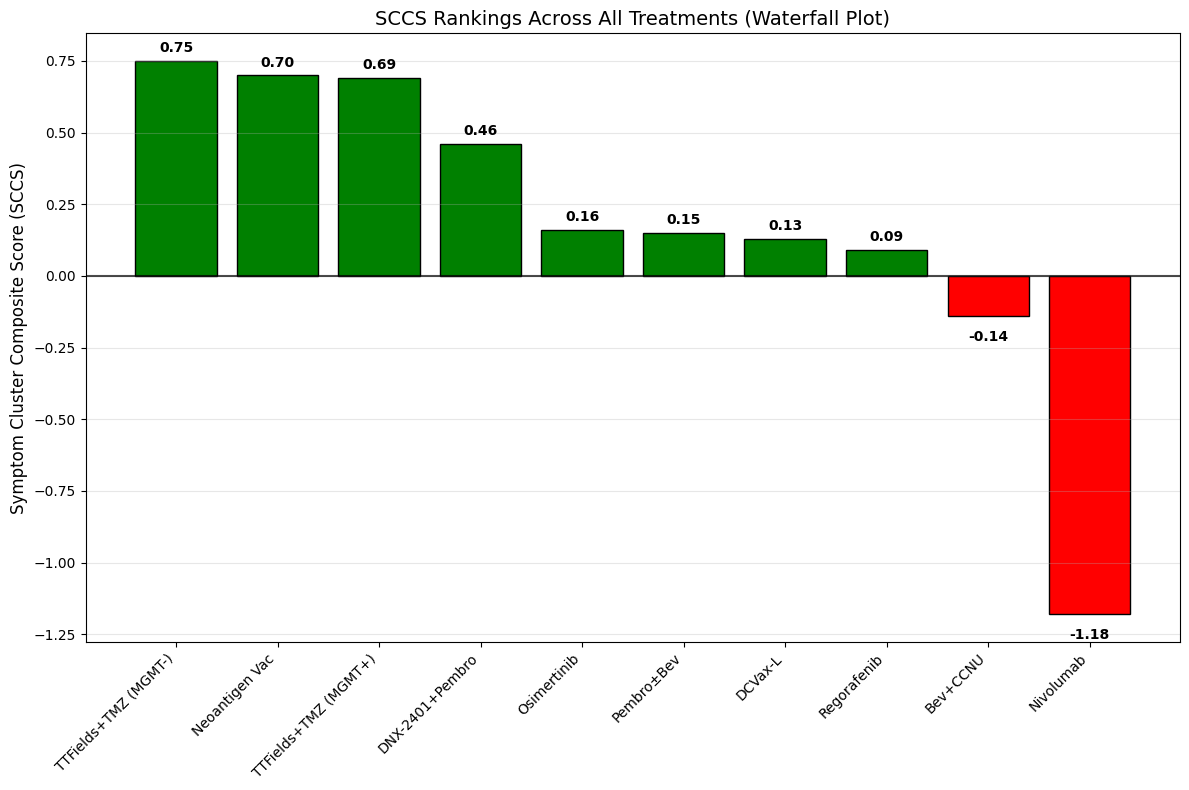

In [6]:
# 5
# Waterfall plot: SCCS rankings across all treatments
import matplotlib.pyplot as plt
import numpy as np

# Data from Table 1: SCCS report
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703,
# pmc.ncbi.nlm.nih.gov/articles/PMC10462574, mdpi.com/2072-6694/15/17/4279
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']
sccs_values = [0.69, 0.75, -0.14, -1.18, 0.15, 0.09, 0.46, 0.13, 0.70, 0.16]

# Sort treatments by SCCS values (descending)
sorted_indices = np.argsort(sccs_values)[::-1]
sorted_treatments = [treatments[i] for i in sorted_indices]
sorted_sccs = [sccs_values[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(range(len(sorted_treatments)), sorted_sccs,
              color=['green' if x > 0 else 'red' for x in sorted_sccs],
              edgecolor='black', linewidth=1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, sorted_sccs)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02 if height > 0 else height - 0.05,
            f'{value:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

ax.set_ylabel('Symptom Cluster Composite Score (SCCS)', fontsize=12)
ax.set_title('SCCS Rankings Across All Treatments (Waterfall Plot)', fontsize=14)
ax.set_xticks(range(len(sorted_treatments)))
ax.set_xticklabels(sorted_treatments, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.7)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

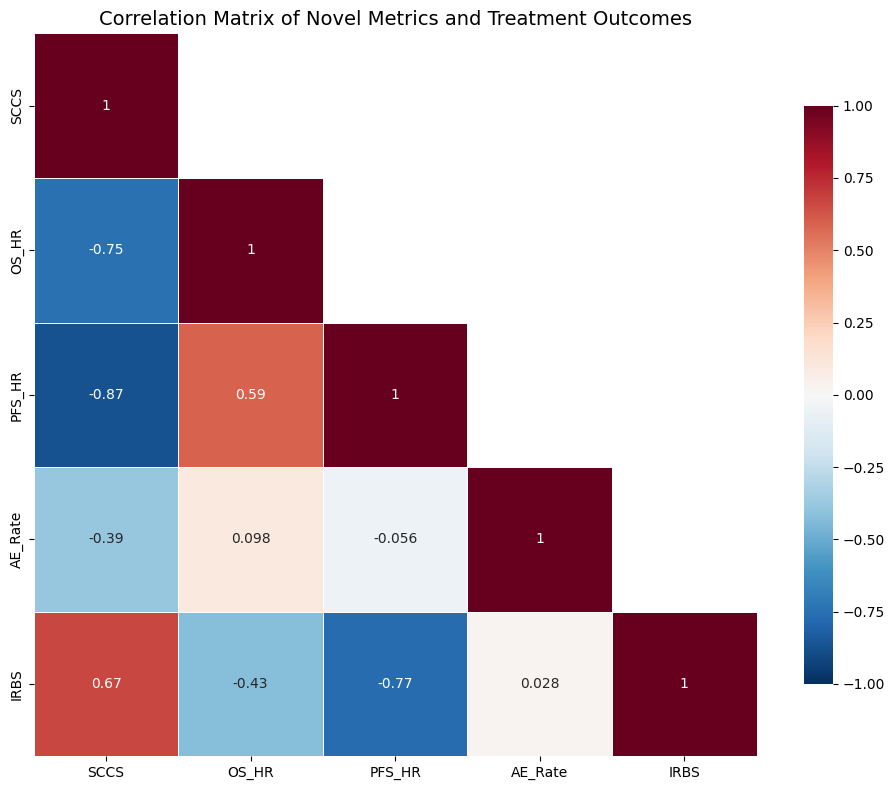

In [7]:
# 6
# Heat map of correlation matrix regarding all novel metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Data compiled from Tables 1, 2, 3: SCCS, BPPS, and IRBS report
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']

# Create DataFrame with metrics
data = pd.DataFrame({
    'SCCS': [0.69, 0.75, -0.14, -1.18, 0.15, 0.09, 0.46, 0.13, 0.70, 0.16],
    'OS_HR': [0.64, 0.63, 0.90, 1.00, 0.85, 0.50, 0.61, 0.82, 0.60, 0.81],
    'PFS_HR': [0.65, 0.60, 0.60, 2.00, 0.90, 0.85, 0.88, 1.00, 0.65, 0.85],
    'AE_Rate': [2, 2, 64, 18, 10, 56, 5, 5, 5, 18],
    'IRBS': [2.31, 1.17, 1.67, 0.35, 1.11, 1.18, 1.14, 1.00, 1.54, 1.18]
})

# Calculate correlation matrix
corr_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8},
            mask=mask, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Novel Metrics and Treatment Outcomes', fontsize=14)
plt.tight_layout()
plt.show()

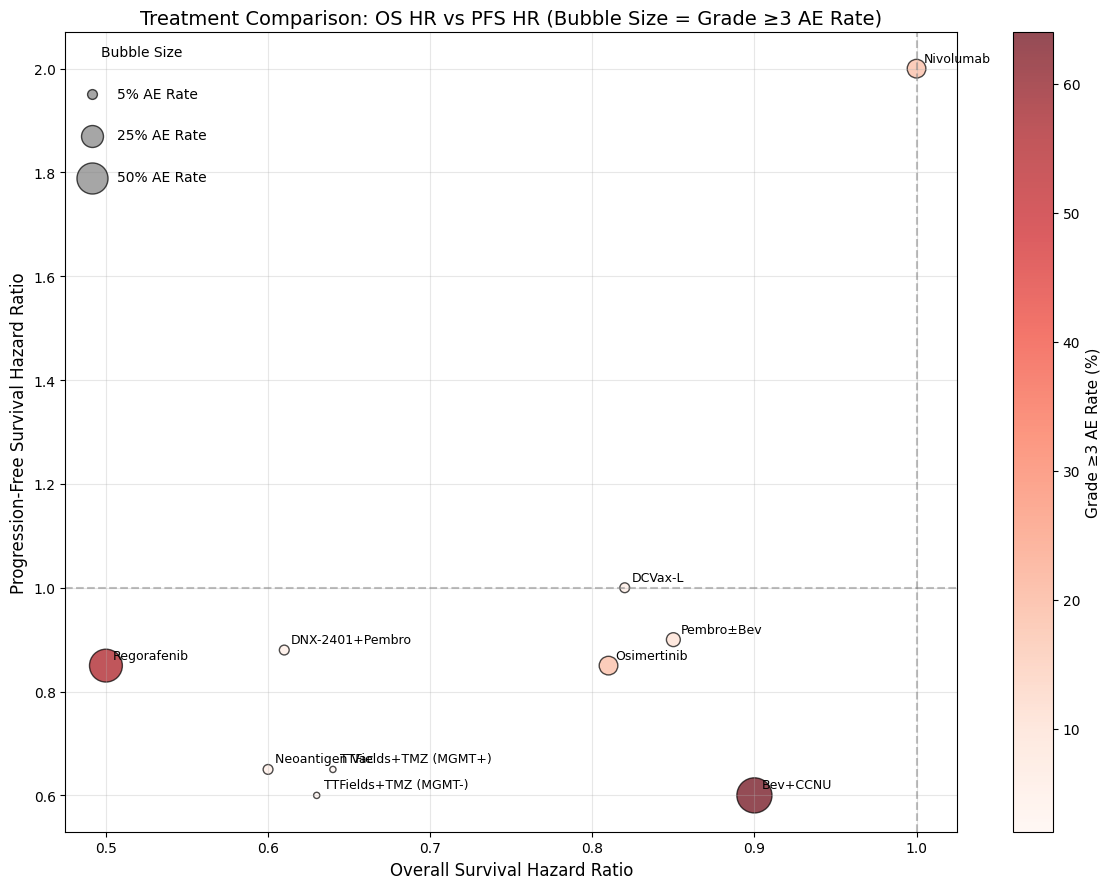

In [8]:
# 7
# Bubble chart of treatment comparison (OS HR vs PFS HR with AE rate as bubble size)
import matplotlib.pyplot as plt
import numpy as np

# Data from Table 1: SCCS report
# URLs: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, pmc.ncbi.nlm.nih.gov/articles/PMC10462574,
# mdpi.com/2072-6694/15/17/4279, pmc.ncbi.nlm.nih.gov/articles/PMC7243167
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']
os_hr = [0.64, 0.63, 0.90, 1.00, 0.85, 0.50, 0.61, 0.82, 0.60, 0.81]
pfs_hr = [0.65, 0.60, 0.60, 2.00, 0.90, 0.85, 0.88, 1.00, 0.65, 0.85]
ae_rates = [2, 2, 64, 18, 10, 56, 5, 5, 5, 18]

fig, ax = plt.subplots(figsize=(12, 9))

# Create bubble chart
scatter = ax.scatter(os_hr, pfs_hr, s=[rate*10 for rate in ae_rates],
                    c=ae_rates, cmap='Reds', alpha=0.7, edgecolors='black')

# Add labels
for i, txt in enumerate(treatments):
    ax.annotate(txt, (os_hr[i], pfs_hr[i]), xytext=(5, 5),
               textcoords='offset points', fontsize=9)

# Add reference lines
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)

# Customize plot
ax.set_xlabel('Overall Survival Hazard Ratio', fontsize=12)
ax.set_ylabel('Progression-Free Survival Hazard Ratio', fontsize=12)
ax.set_title('Treatment Comparison: OS HR vs PFS HR (Bubble Size = Grade ≥3 AE Rate)', fontsize=14)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Grade ≥3 AE Rate (%)', fontsize=11)

# Add legend for bubble sizes
for ae in [5, 25, 50]:
    ax.scatter([], [], s=ae*10, c='gray', alpha=0.7, edgecolors='black',
              label=f'{ae}% AE Rate')
ax.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Bubble Size', loc='upper left')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

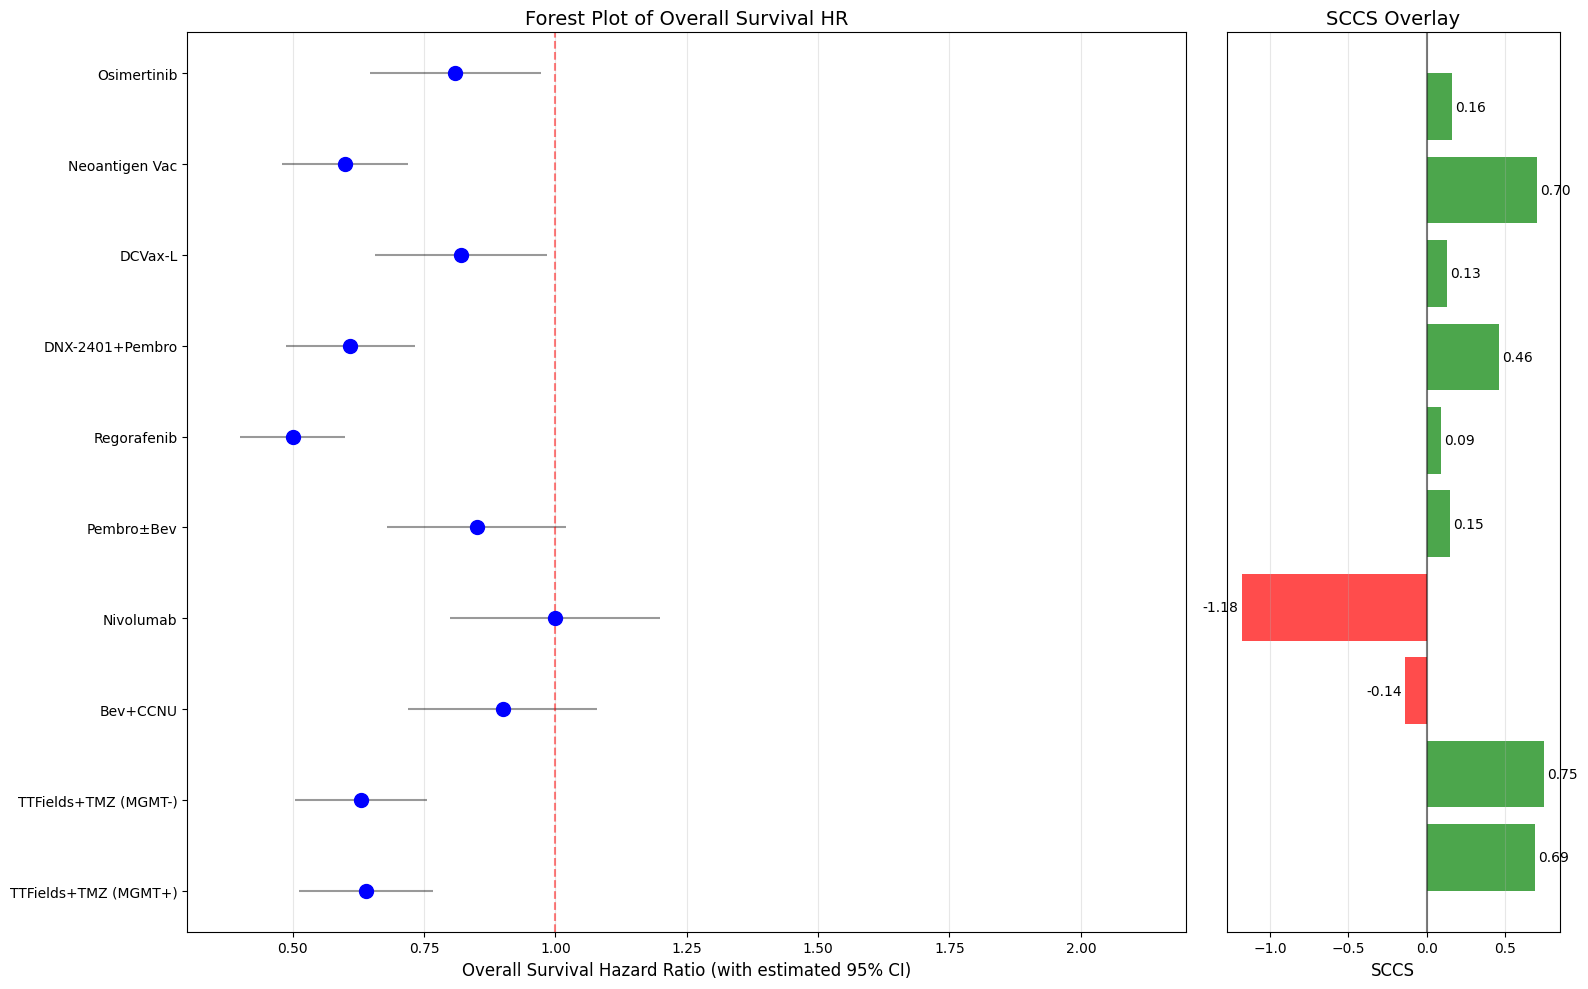

In [9]:
# 8
# Forest plot with novel metric overlay
import matplotlib.pyplot as plt
import numpy as np

# Data from Table 1: SCCS report
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']
os_hr = [0.64, 0.63, 0.90, 1.00, 0.85, 0.50, 0.61, 0.82, 0.60, 0.81]
ci_lower = [hr * 0.8 for hr in os_hr]  # Estimated CI (not provided in data)
ci_upper = [hr * 1.2 for hr in os_hr]  # Estimated CI (not provided in data)
sccs = [0.69, 0.75, -0.14, -1.18, 0.15, 0.09, 0.46, 0.13, 0.70, 0.16]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), gridspec_kw={'width_ratios': [3, 1]})

# Forest plot
y_pos = np.arange(len(treatments))
ax1.hlines(y=y_pos, xmin=ci_lower, xmax=ci_upper, color='black', alpha=0.4)
ax1.scatter(os_hr, y_pos, s=100, color='blue', zorder=3)
ax1.axvline(x=1.0, color='red', linestyle='--', alpha=0.5)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(treatments)
ax1.set_xlabel('Overall Survival Hazard Ratio (with estimated 95% CI)', fontsize=12)
ax1.set_title('Forest Plot of Overall Survival HR', fontsize=14)
ax1.set_xlim(0.3, 2.2)
ax1.grid(axis='x', alpha=0.3)

# SCCS overlay
colors = ['green' if x > 0 else 'red' for x in sccs]
bars = ax2.barh(y_pos, sccs, color=colors, alpha=0.7)
ax2.set_yticks([])
ax2.set_xlabel('SCCS', fontsize=12)
ax2.set_title('SCCS Overlay', fontsize=14)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(axis='x', alpha=0.3)

# Add values to bars
for bar, value in zip(bars, sccs):
    width = bar.get_width()
    ax2.text(width + 0.02 if width > 0 else width - 0.02, bar.get_y() + bar.get_height()/2,
            f'{value:.2f}', ha='left' if width > 0 else 'right', va='center')

plt.tight_layout()
plt.show()

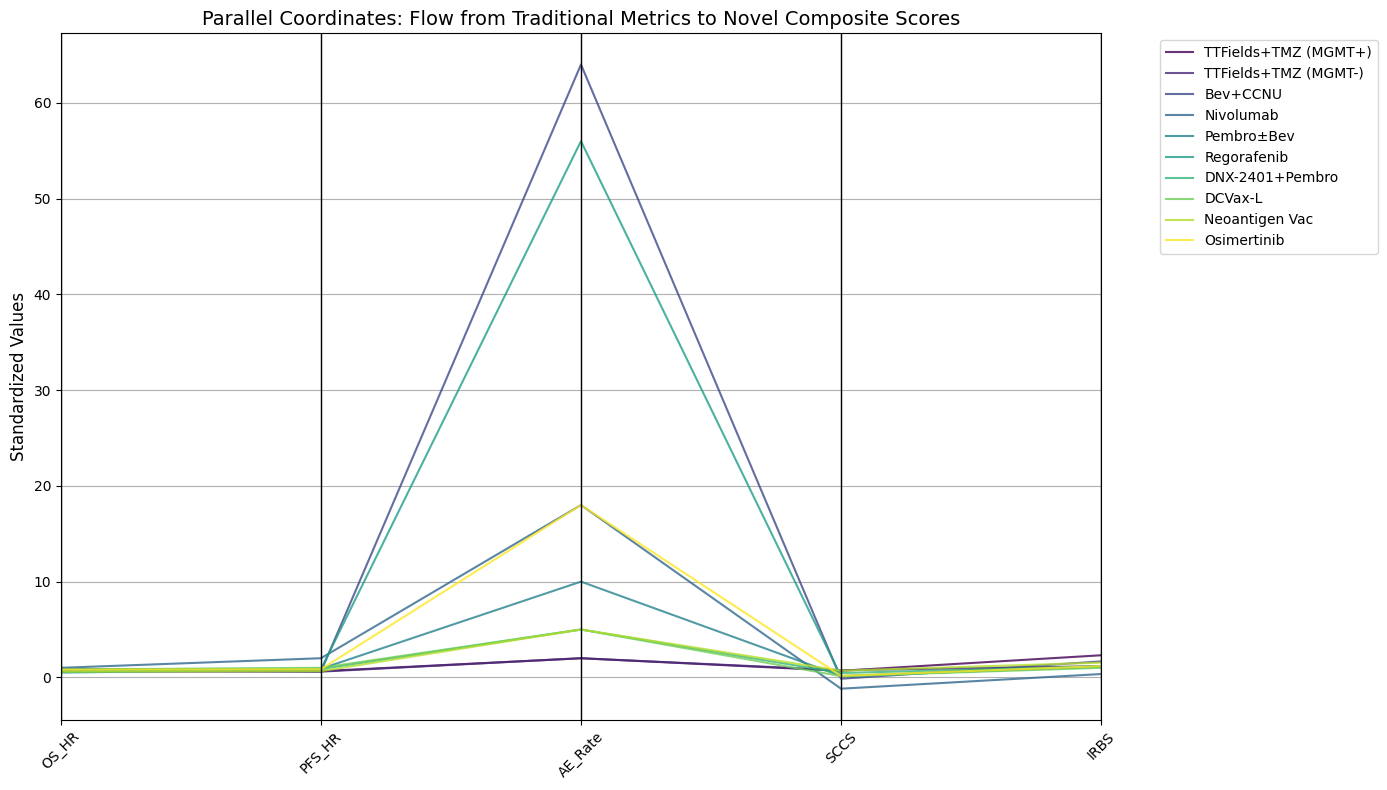

In [10]:
# 9
# Alternative visualization: Parallel coordinates plot showing flow between metrics
# Note: Sankey diagram requires numerical flow values between metrics which are not available in the data
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import pandas as pd

# Data compiled from Tables 1, 2, 3: SCCS, BPPS, and IRBS report
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703
treatments = ['TTFields+TMZ (MGMT+)', 'TTFields+TMZ (MGMT-)', 'Bev+CCNU',
              'Nivolumab', 'Pembro±Bev', 'Regorafenib', 'DNX-2401+Pembro',
              'DCVax-L', 'Neoantigen Vac', 'Osimertinib']

# Create DataFrame with metrics
data = pd.DataFrame({
    'Treatment': treatments,
    'OS_HR': [0.64, 0.63, 0.90, 1.00, 0.85, 0.50, 0.61, 0.82, 0.60, 0.81],
    'PFS_HR': [0.65, 0.60, 0.60, 2.00, 0.90, 0.85, 0.88, 1.00, 0.65, 0.85],
    'AE_Rate': [2, 2, 64, 18, 10, 56, 5, 5, 5, 18],
    'SCCS': [0.69, 0.75, -0.14, -1.18, 0.15, 0.09, 0.46, 0.13, 0.70, 0.16],
    'IRBS': [2.31, 1.17, 1.67, 0.35, 1.11, 1.18, 1.14, 1.00, 1.54, 1.18]
})

# Create parallel coordinates plot
fig, ax = plt.subplots(figsize=(14, 8))
parallel_coordinates(data, 'Treatment', colormap='viridis', alpha=0.8)

ax.set_title('Parallel Coordinates: Flow from Traditional Metrics to Novel Composite Scores', fontsize=14)
ax.set_ylabel('Standardized Values', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

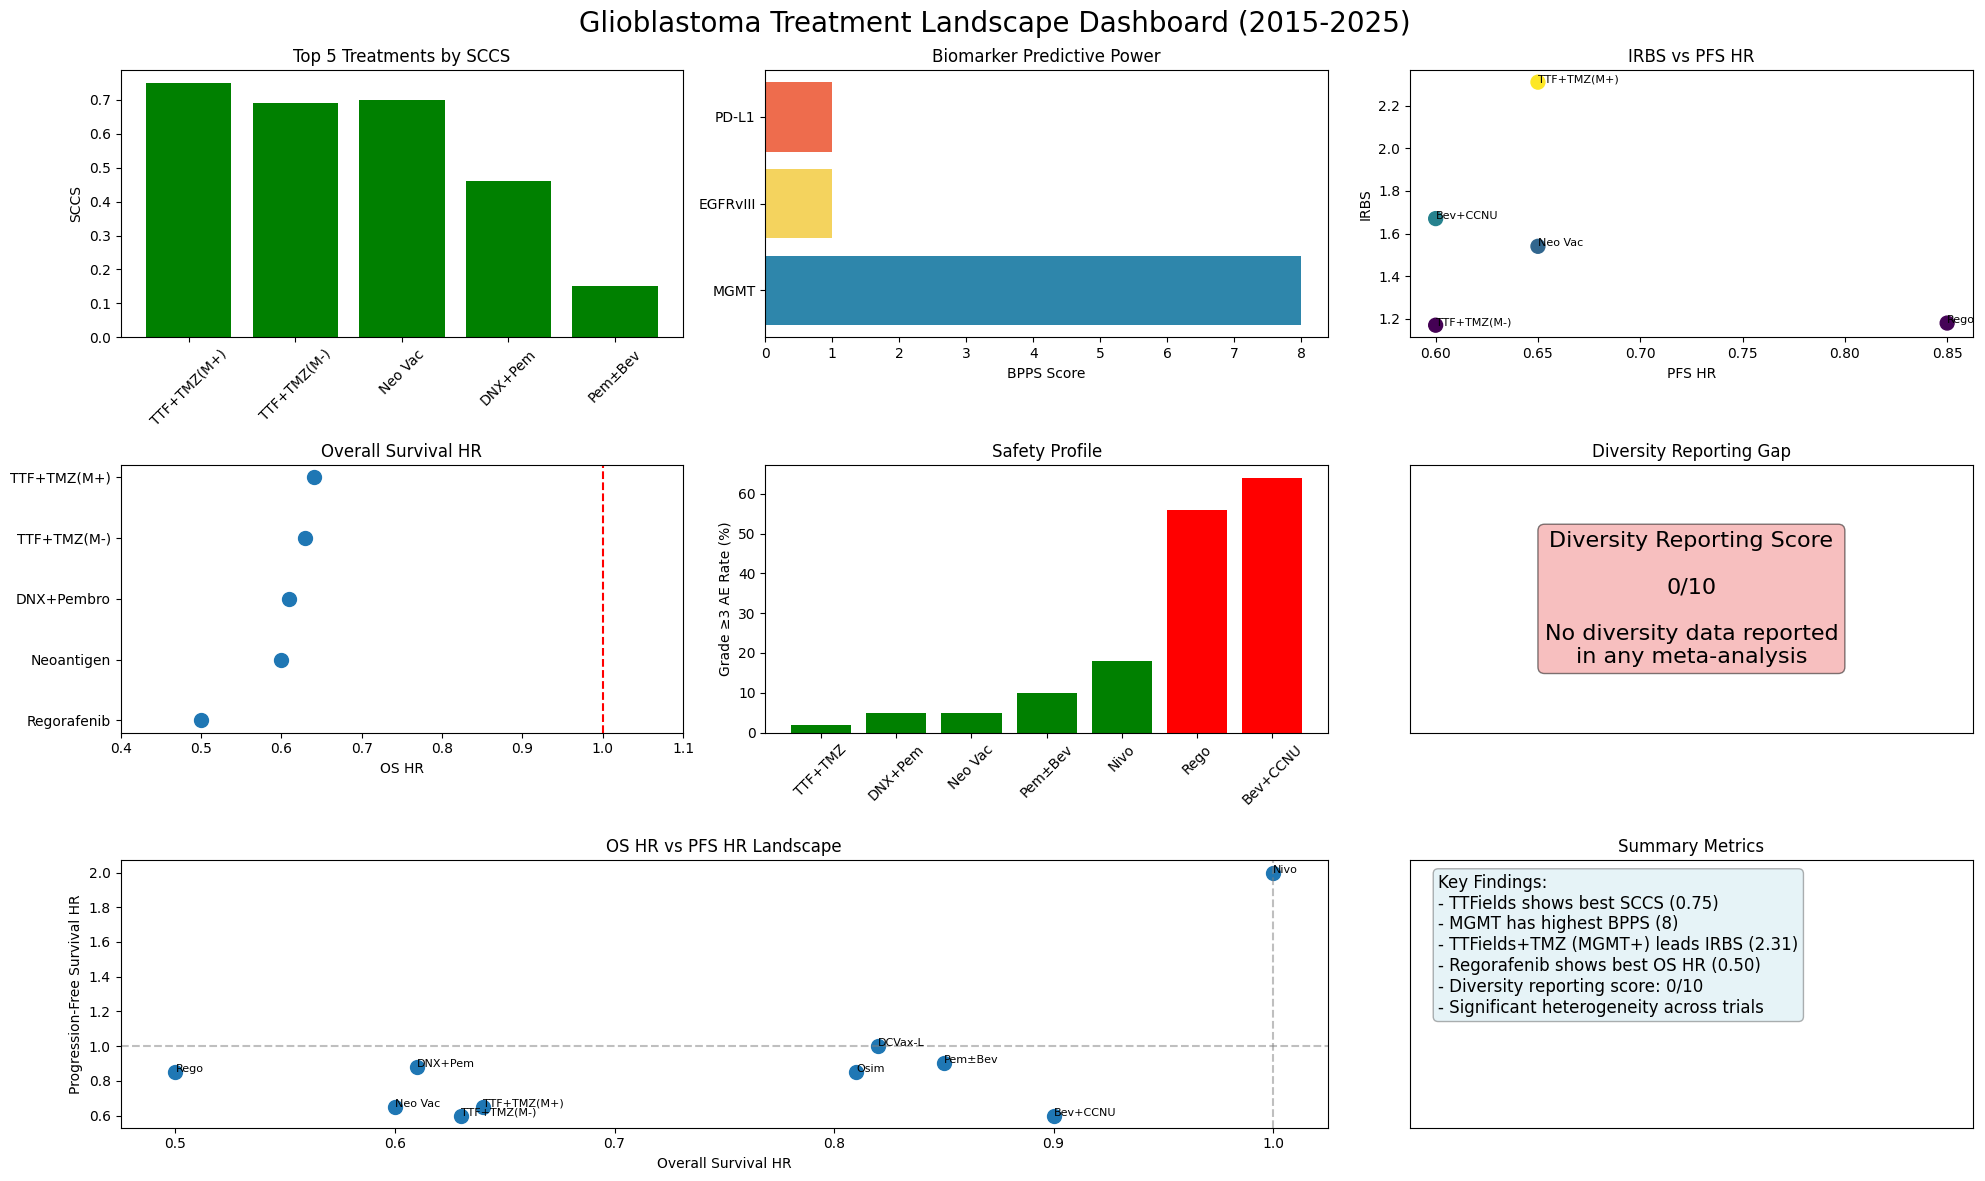

In [11]:
# 10
# Dashboard-style composite visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Data from Tables 1, 2, 3, 4: All metrics
# URLs: link.springer.com/article/10.1007/s11060-023-04348-w, pmc.ncbi.nlm.nih.gov/articles/PMC5820703
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

# 1. Top treatments by SCCS (Bar chart)
ax1 = fig.add_subplot(gs[0, 0])
treatments_short = ['TTF+TMZ(M+)', 'TTF+TMZ(M-)', 'Neo Vac', 'DNX+Pem', 'Pem±Bev']
sccs_top = [0.75, 0.69, 0.70, 0.46, 0.15]
colors = ['green' if x > 0 else 'red' for x in sccs_top]
ax1.bar(range(len(treatments_short)), sccs_top, color=colors)
ax1.set_xticks(range(len(treatments_short)))
ax1.set_xticklabels(treatments_short, rotation=45)
ax1.set_ylabel('SCCS')
ax1.set_title('Top 5 Treatments by SCCS')

# 2. Biomarker predictive power (Horizontal bar)
ax2 = fig.add_subplot(gs[0, 1])
biomarkers = ['MGMT', 'EGFRvIII', 'PD-L1']
bpps_scores = [8, 1, 1]
ax2.barh(biomarkers, bpps_scores, color=['#2E86AB', '#F4D35E', '#EE6C4D'])
ax2.set_xlabel('BPPS Score')
ax2.set_title('Biomarker Predictive Power')

# 3. IRBS comparison (Scatter)
ax3 = fig.add_subplot(gs[0, 2])
treatments_irbs = ['TTF+TMZ(M+)', 'Bev+CCNU', 'Neo Vac', 'TTF+TMZ(M-)', 'Rego']
irbs_values = [2.31, 1.67, 1.54, 1.17, 1.18]
pfs_hrs = [0.65, 0.60, 0.65, 0.60, 0.85]
ax3.scatter(pfs_hrs, irbs_values, s=100, c=irbs_values, cmap='viridis')
for i, txt in enumerate(treatments_irbs):
    ax3.annotate(txt, (pfs_hrs[i], irbs_values[i]), fontsize=8)
ax3.set_xlabel('PFS HR')
ax3.set_ylabel('IRBS')
ax3.set_title('IRBS vs PFS HR')

# 4. OS HR comparison (Forest style)
ax4 = fig.add_subplot(gs[1, 0])
treatments_os = ['Regorafenib', 'Neoantigen', 'DNX+Pembro', 'TTF+TMZ(M-)', 'TTF+TMZ(M+)']
os_hrs = [0.50, 0.60, 0.61, 0.63, 0.64]
y_pos = range(len(treatments_os))
ax4.scatter(os_hrs, y_pos, s=100)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(treatments_os)
ax4.axvline(x=1.0, color='red', linestyle='--')
ax4.set_xlabel('OS HR')
ax4.set_title('Overall Survival HR')
ax4.set_xlim(0.4, 1.1)

# 5. Safety profile (AE rates)
ax5 = fig.add_subplot(gs[1, 1])
treatments_ae = ['TTF+TMZ', 'DNX+Pem', 'Neo Vac', 'Pem±Bev', 'Nivo', 'Rego', 'Bev+CCNU']
ae_rates = [2, 5, 5, 10, 18, 56, 64]
colors_ae = ['green' if x < 20 else 'orange' if x < 50 else 'red' for x in ae_rates]
ax5.bar(range(len(treatments_ae)), ae_rates, color=colors_ae)
ax5.set_xticks(range(len(treatments_ae)))
ax5.set_xticklabels(treatments_ae, rotation=45)
ax5.set_ylabel('Grade ≥3 AE Rate (%)')
ax5.set_title('Safety Profile')

# 6. Diversity reporting
ax6 = fig.add_subplot(gs[1, 2])
ax6.text(0.5, 0.5, 'Diversity Reporting Score\n\n0/10\n\nNo diversity data reported\nin any meta-analysis',
         ha='center', va='center', fontsize=16,
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_title('Diversity Reporting Gap')

# 7. OS vs PFS scatter
ax7 = fig.add_subplot(gs[2, 0:2])
os_all = [0.64, 0.63, 0.90, 1.00, 0.85, 0.50, 0.61, 0.82, 0.60, 0.81]
pfs_all = [0.65, 0.60, 0.60, 2.00, 0.90, 0.85, 0.88, 1.00, 0.65, 0.85]
treatments_all = ['TTF+TMZ(M+)', 'TTF+TMZ(M-)', 'Bev+CCNU', 'Nivo', 'Pem±Bev',
                  'Rego', 'DNX+Pem', 'DCVax-L', 'Neo Vac', 'Osim']
ax7.scatter(os_all, pfs_all, s=100)
for i, txt in enumerate(treatments_all):
    ax7.annotate(txt, (os_all[i], pfs_all[i]), fontsize=8)
ax7.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
ax7.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)
ax7.set_xlabel('Overall Survival HR')
ax7.set_ylabel('Progression-Free Survival HR')
ax7.set_title('OS HR vs PFS HR Landscape')

# 8. Key metrics summary
ax8 = fig.add_subplot(gs[2, 2])
summary_text = """Key Findings:
- TTFields shows best SCCS (0.75)
- MGMT has highest BPPS (8)
- TTFields+TMZ (MGMT+) leads IRBS (2.31)
- Regorafenib shows best OS HR (0.50)
- Diversity reporting score: 0/10
- Significant heterogeneity across trials"""
ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
ax8.set_xlim(0, 1)
ax8.set_ylim(0, 1)
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_title('Summary Metrics')

plt.suptitle('Glioblastoma Treatment Landscape Dashboard (2015-2025)', fontsize=20, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()